In [1]:
from numpy.random import seed
from compute_rmse import compute_rmse as rmse
from tensorflow import keras
from keras import backend as K, callbacks, layers
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

print("Tensorflow version: " + tf.__version__)
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=14, titlepad=10)
%matplotlib inline
warnings.filterwarnings('ignore')
seed(42)
tf.random.set_seed(42)


Tensorflow version: 2.10.0


Data input


In [2]:
df = pd.read_csv('input/train.csv', sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [5]:
df.isnull().values.any()

False

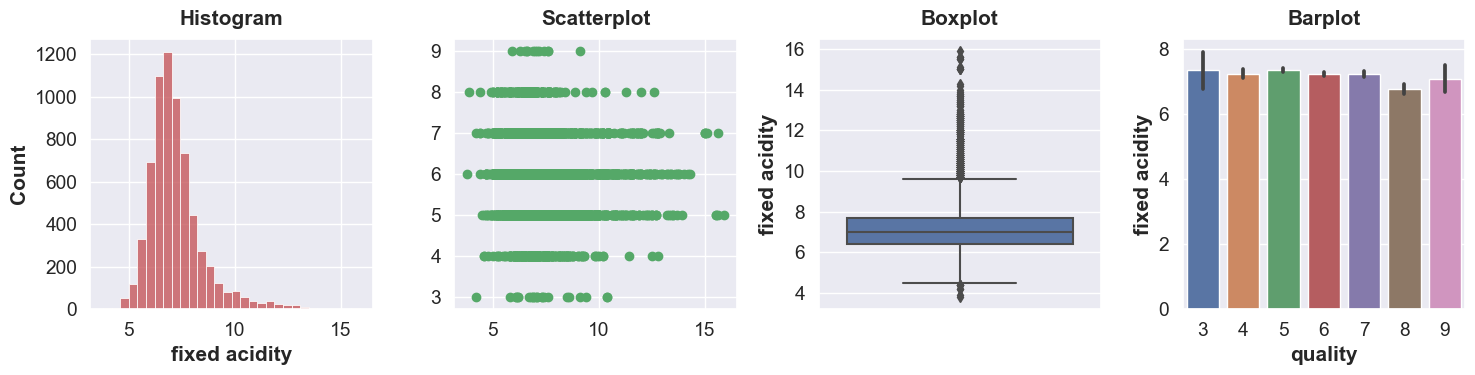

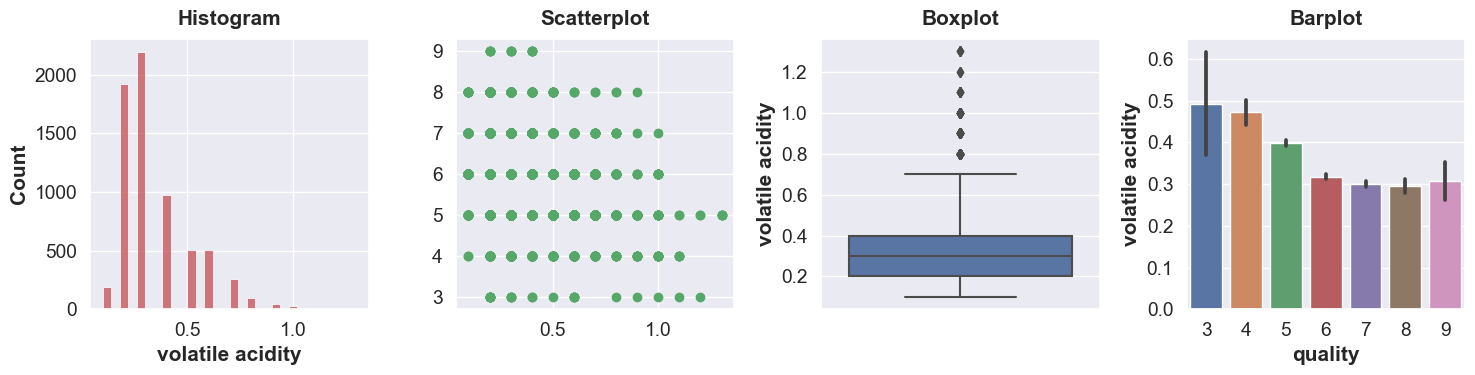

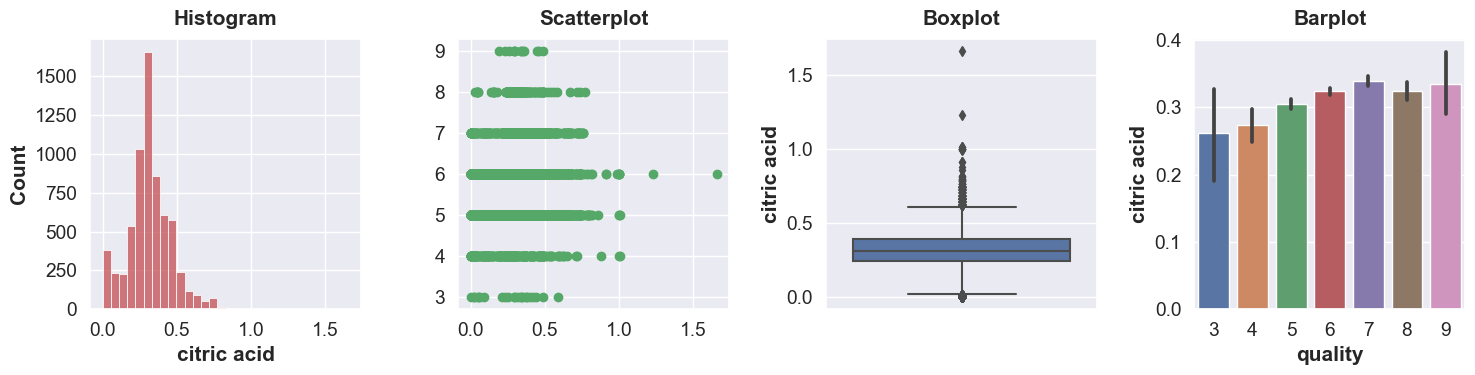

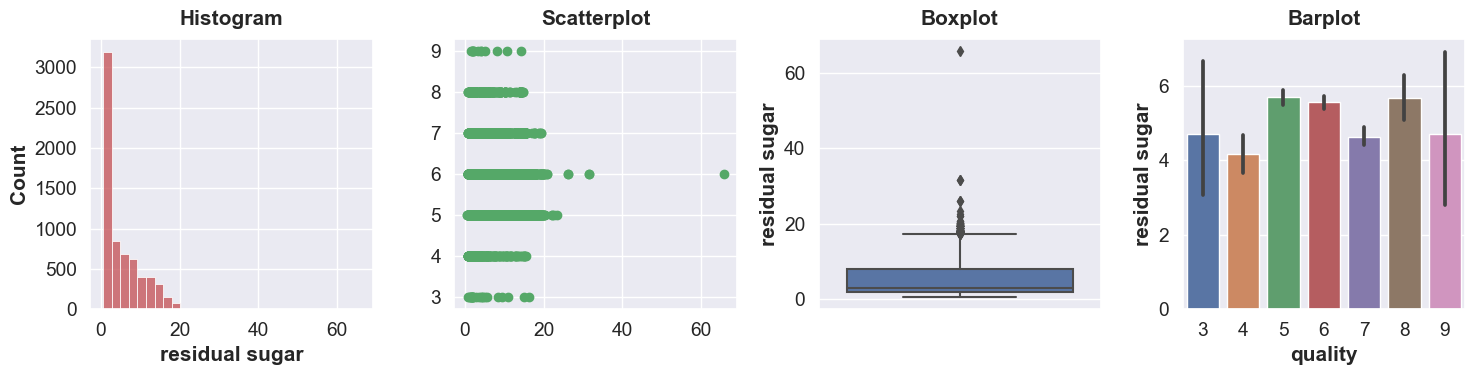

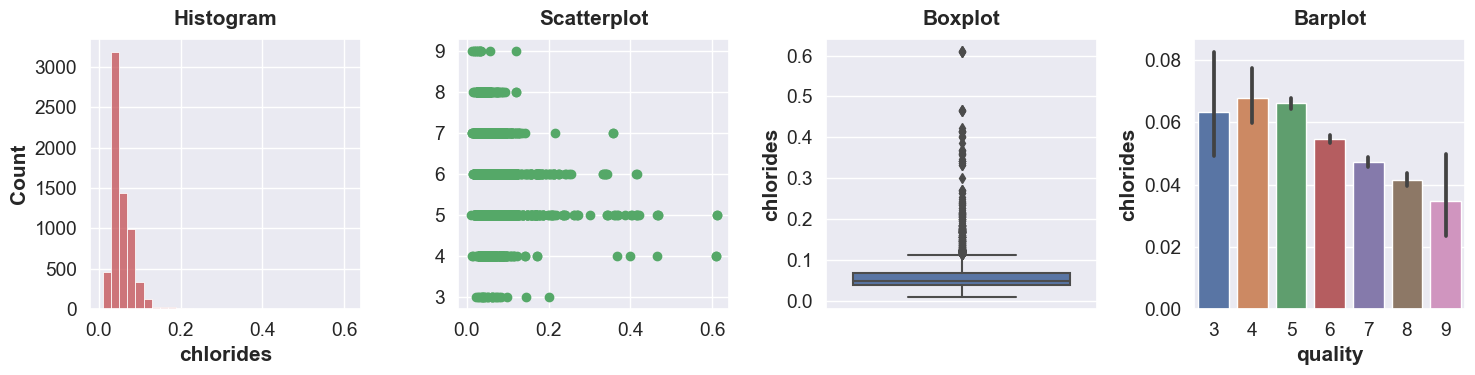

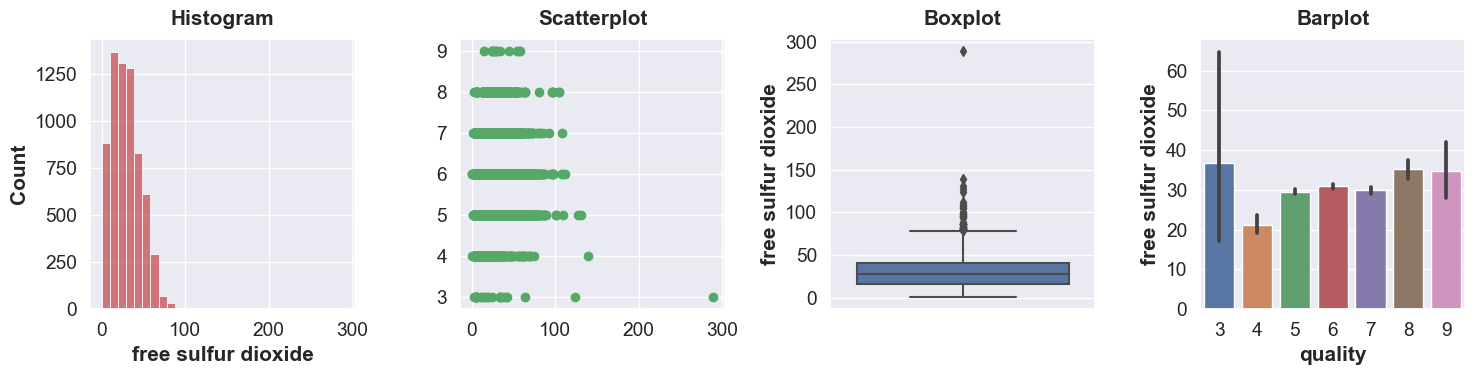

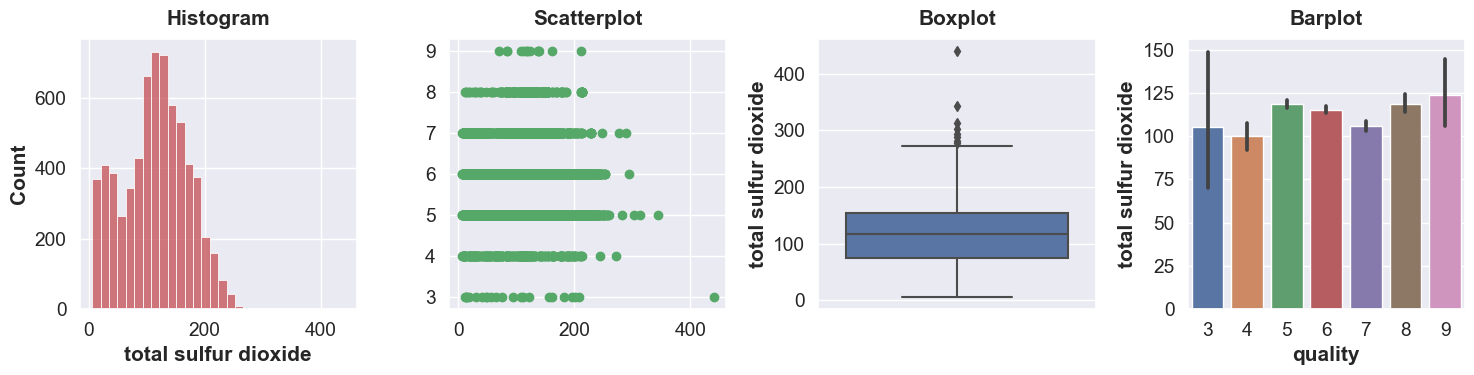

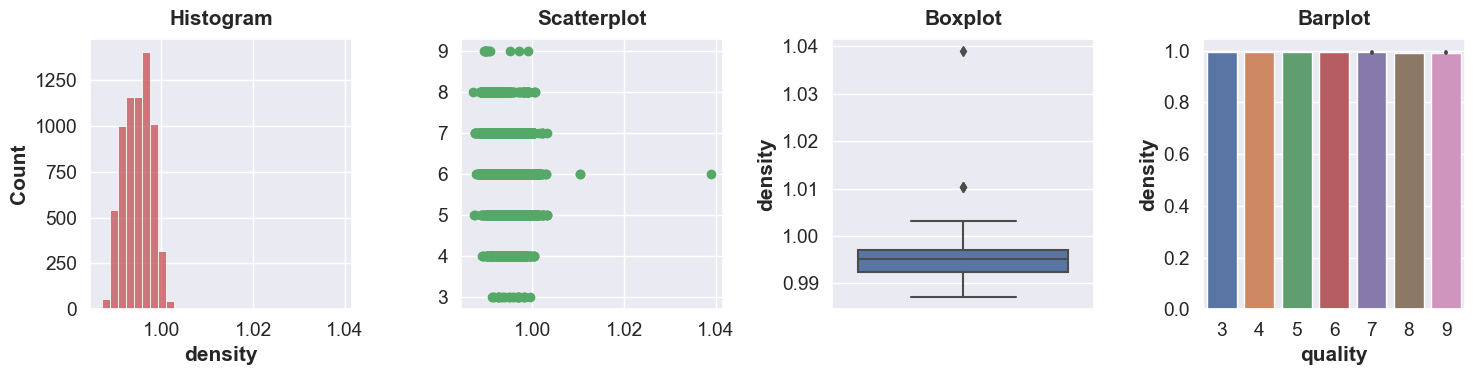

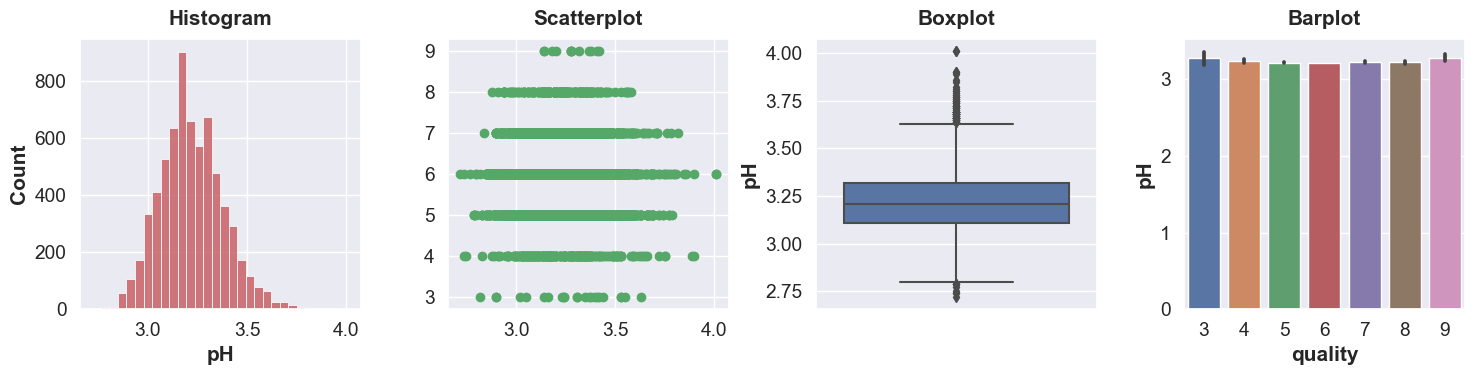

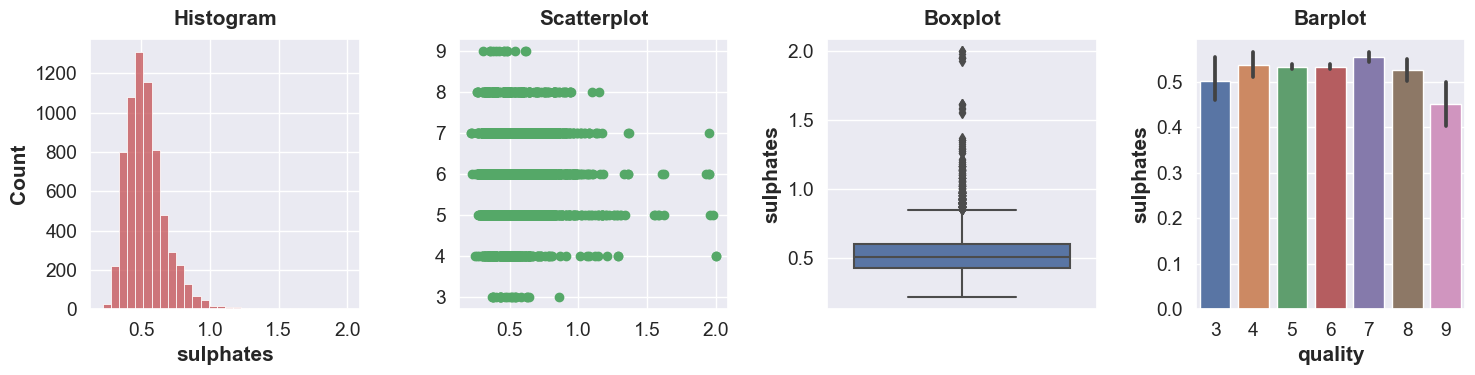

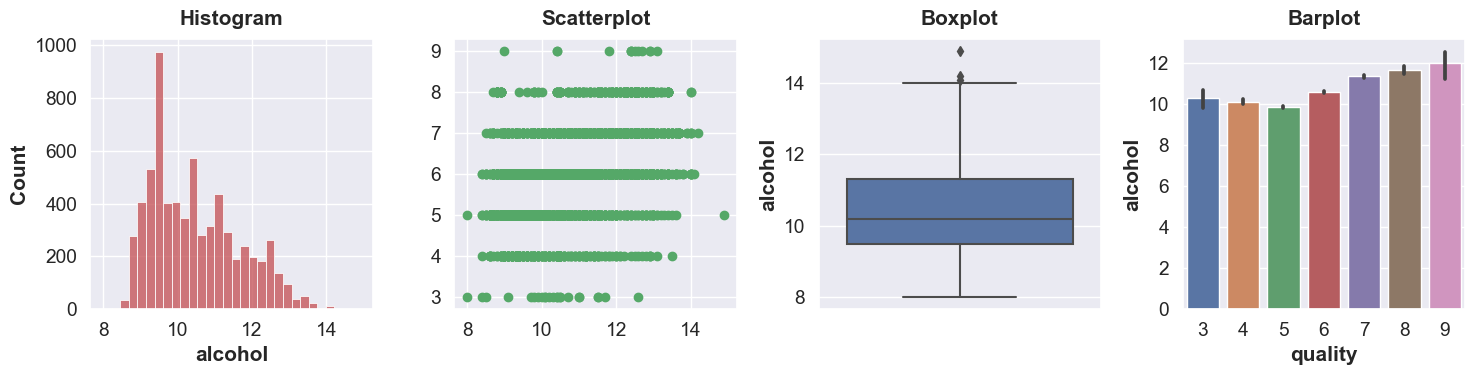

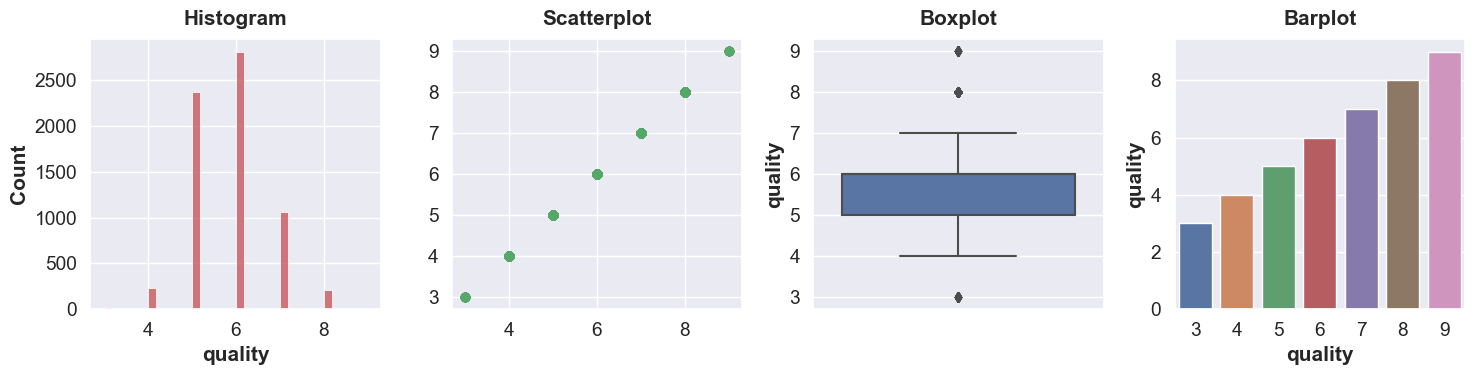

In [22]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(15, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()
for variable in df.drop('type', axis = 1):
    diagnostic_plots(df,variable,'quality')

In [25]:
df.skew(axis = 0)

fixed acidity           1.770634
volatile acidity        1.357692
citric acid             0.498180
residual sugar          1.449472
chlorides               5.692030
free sulfur dioxide     1.169458
total sulfur dioxide    0.012788
density                 0.425231
pH                      0.416576
sulphates               2.157673
alcohol                 0.616383
quality                 0.333877
dtype: float64

In [23]:
df.kurtosis(axis = 0, bias = False)

fixed acidity            5.214376
volatile acidity         2.183113
citric acid              2.240237
residual sugar           4.350428
chlorides               53.779375
free sulfur dioxide      7.556816
total sulfur dioxide    -0.461114
density                  6.075478
pH                       0.454295
sulphates               11.391954
alcohol                 -0.497568
quality                  0.267243
dtype: float64

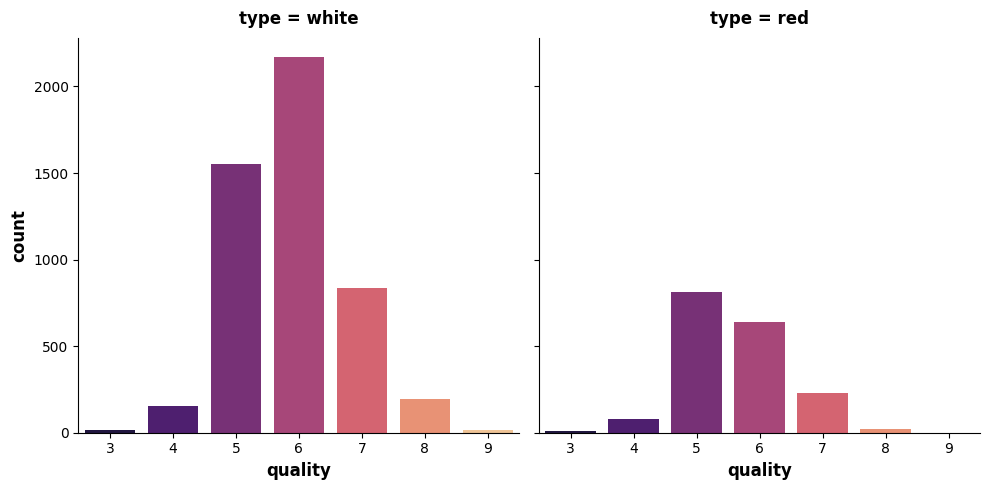

In [7]:
sns.catplot(x='quality', col = 'type', kind='count', data=df, palette = 'magma')


<AxesSubplot: >

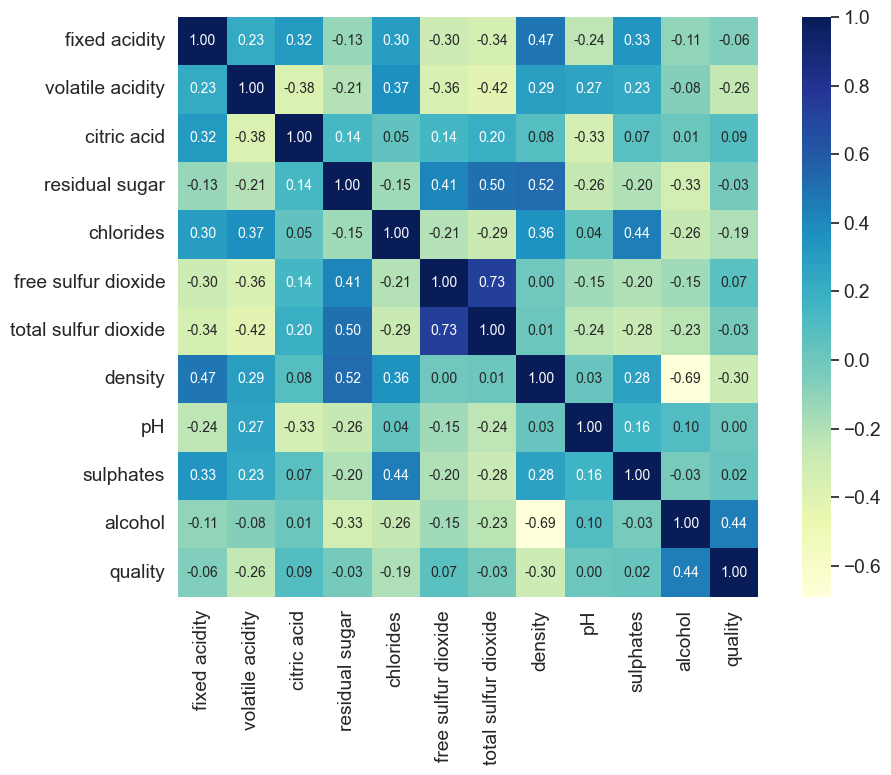

In [8]:
plt.figure(figsize = (10,8))
sns.set(font_scale=1.25)
sns.heatmap(df.corr(), cmap = 'YlGnBu', cbar_kws = {'shrink': 1}, annot = True, cbar = True, fmt = '.2f', annot_kws={'size': 10}, square = True) 

one hot encoder

In [9]:
transformer_cat = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
transformer_minmax = make_pipeline(MinMaxScaler(feature_range=(-1, 1)))
transformer_std = make_pipeline(StandardScaler())

In [13]:
features_minmax = list(df.drop(['type', 'quality'], axis = 1).columns.values)
features_cat = ['type']
features_std = ['']
print(features_minmax)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [12]:
preprocessor = make_column_transformer(
    (transformer_minmax, features_minmax),
    (transformer_cat, features_cat)
    (transformer_std, features_std)
)


NameError: name 'features_std' is not defined

In [ ]:
def split(data):
    """_summary_ : Split the data into train, validation and test sets.

    Args:
        data (DataFrame): Data to split

    Returns:
        DataFrame: train, validation and test sets  
    """
    train, val_and_test = train_test_split(data, test_size = 0.2, random_state=42)
    val, test = train_test_split(val_and_test, test_size = 0.5, random_state=42)
    return train, val, test

In [ ]:
train, val, test = split(df)

In [ ]:
train.shape, val.shape, test.shape

((5371, 13), (671, 13), (672, 13))

In [ ]:
def split_target(data):
    """_summary_ : Splitting the data into features and target.

    Args:
        data (_type_): data to split

    Returns:
        _type_: features and target
    """
    # Splitting the data into features and target.
    X, y = data.drop('quality', axis = 1), data['quality']
    return X, y

def transform_features(X):
    """_summary_ : Transforming the features using the preprocessor.

    Args:
        X (_type_): features to transform

    Returns:
        _type_: transformed features
    """
    X_transform = pd.DataFrame(preprocessor.fit_transform(X))
    X_transform.columns = features_minmax + ['red', 'white']
    return X_transform 

def split_transform(data):
    '''Splitting the data into features and target, and then transforming the features.'''
    X, y = split_target(data)
    return transform_features(X), y

X_train, y_train = split_transform(train)
X_val, y_val = split_transform(val)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

NameError: name 'train' is not defined

In [ ]:
X_train 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white
0,-0.272727,0.000000,-0.722892,-0.957055,-0.709516,-0.909722,-0.654378,-0.606936,-0.271318,-0.460674,-0.594203,1.0,0.0
1,-0.272727,-0.166667,-0.879518,-0.953988,-0.796327,-0.833333,-0.751152,-0.641618,-0.116279,-0.404494,-0.159420,1.0,0.0
2,-0.520661,-0.500000,-0.722892,-0.865031,-0.515860,-0.666667,-0.359447,-0.707129,-0.302326,-0.696629,-0.594203,0.0,1.0
3,-0.355372,-0.500000,-0.662651,-0.880368,-0.886477,-0.777778,-0.557604,-0.818882,-0.317829,-0.617978,0.217391,0.0,1.0
4,-0.371901,-0.833333,-0.614458,-0.441718,-0.883139,-0.784722,-0.138249,-0.499037,-0.410853,-0.685393,-0.623188,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,-0.404959,-0.333333,-0.710843,-0.555215,-0.939900,-0.770833,-0.322581,-0.684008,-0.364341,-0.674157,0.159420,0.0,1.0
5367,-0.570248,-0.666667,-0.662651,-0.984663,-0.913189,-0.798611,-0.520737,-0.822736,-0.379845,-0.775281,-0.275362,0.0,1.0
5368,-0.157025,-0.666667,-0.602410,-0.769939,-0.959933,-0.680556,-0.096774,-0.672447,-0.364341,-0.730337,-0.188406,0.0,1.0
5369,-0.570248,0.000000,-0.891566,-0.785276,-0.893155,-0.770833,-0.364055,-0.703276,-0.162791,-0.820225,-0.391304,0.0,1.0


In [ ]:
df.kurtosis()

fixed acidity            5.214376
volatile acidity         2.183113
citric acid              2.240237
residual sugar           4.350428
chlorides               53.779375
free sulfur dioxide      7.556816
total sulfur dioxide    -0.461114
density                  6.075478
pH                       0.454295
sulphates               11.391954
alcohol                 -0.497568
quality                  0.267243
dtype: float64